# Real estate adverts research

The service Yandex.RealEstate has provided us with the archive of real estate deals in Saint-Petersburg and its surrounding areas over a few years. There are two types of data available for each item: data provided by users, and automatically received data based on the items' geographical data; such as a distance to the city centre, airport, parks or water basins.

###### Goal

Determine variables in order to define the market price of real estate items in order to build an automated system for tracking anomalies and fraudulent activities.

###### Plan

1. Review and descriptive analysis
1. Data preprocessing
1. Data augmentation
1. Exploratory analysis
1. Conclusion

## Data review

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Reading data from the file

In [2]:
try: 
    data = pd.read_csv('https://raw.githubusercontent.com/Rikka-irk/Data-Analysis/main/Exploratory%20Data%20Analysis/real_estate_data.csv', 
                   sep = '\t')
    
except: 
    print('File reading error. Check the URLs')

In [3]:
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


General information about the dataset: data types, column names, row count

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Describing the data

_Apartment description:_
- `rooms`
- `floor` 
- `floors_total` — number of stories
- `living_area` — living area in square meters (m²)
- `kitchen_area` — kitchen area in square meters (м²)
- `total_area` — total area in square meters (м²)
- `ceiling_height` — ceiling heigt in meters (м)
- `balcony` — number of balconies


_Apartment type:_ 
- `is_apartment` — apart hotels (boolean type)
- `studio` — studio flat (boolean type)
- `open_plan` — open plan (boolean type) 

_Photos:_ 
- `total_images` — the number of attached images of the flat

_Price:_ 
- `last_price` — the last occured price

_Ads' publication timeframe:_ 
- `first_day_exposition` — the first publication date
- `days_exposition` — the amount of days the ad was active 

_Location:_ 
- `locality_name` — the locality name

_Surroundings description based on the geographical data:_ 
- `airports_nearest` —  distance to the nearest airport (m)
- `cityCenters_nearest` — distance to the city centre (m)
- `parks_around3000` —  quantity of parks in a 3 kilometers radius 
- `parks_nearest` — distance to the nearest park (m)
- `ponds_around3000` — quantity of water basins in a 3 kilometers radius 
- `ponds_nearest` — distance to the nearest water basin (m)

**Recieved data contains anomalies:**
1. The column naming is not consistent
1. Not all of the rows have all columns filled
1. The following columns' data types do not match the description: `is_apartment`, `balcony`, `parks_around3000`,`ponds_around3000`, `days_exposition`, `floors_total`
1. The ceilings' height of over 10 meters and less than 2 meters look suspicious
1. The highest price is close to 1 billion rubles which is too expensive even for Saint-Petersburg.

### Conclusion

At this point we can say that we have enough data for the hypothesis verification.    
However there are some missing data, anomalies and occurrence of some abnormal values.

## Data preprocessing

### Renaming columns

Rename the columns according to the standart.

In [6]:
data.columns = data.columns.str.replace('studio', 'is_studio')
data.columns = data.columns.str.replace('open_plan', 'is_open_plan')
data.columns = data.columns.str.replace('cityCenters_nearest', 'city_centers_nearest')
data.columns = data.columns.str.replace('ponds_around3000', 'ponds_around_3000')
data.columns = data.columns.str.replace('parks_around3000', 'parks_around_3000')
data.columns = data.columns.str.replace(' ', '')

### Filling missing values

#### The area of the facility

We can calculate the living area `living_area` from the total area `total_area` and kitchen area `kitchen_area`.   
Because the area of the premises consists not only of the kitchen and living areas, but also hallways and balconies. We can find the average ratio of non-living area using the data without missing values.

Counting rows without missing values.

In [7]:
len(data.loc[(data['living_area'].isnull())|(data['kitchen_area'].isnull())])

2717

Creating an additional table with total area data

In [8]:
area_stat = data.loc[
        ~data['living_area'].isnull() 
        &
        ~data['kitchen_area'].isnull() 
        &
        ~data['total_area'].isnull() 
        ][['living_area','kitchen_area','total_area']]
area_stat

,living_area,kitchen_area,total_area
0,51.0,25.00,108.00
1,18.6,11.00,40.40
2,34.3,8.30,56.00
4,32.0,41.00,100.00
5,14.4,9.10,30.40
...,...,...,...
23692,17.5,6.00,30.00
23693,40.0,8.00,62.40
23694,73.3,13.83,133.81
23695,38.0,8.50,59.00


Subtract the kitchen and the living area from the total area to get the non-living area (hallways and balconies).
Find its ratio.

In [9]:
area_stat['ratio_corridor_area'] = round((area_stat.total_area - area_stat.kitchen_area - area_stat.living_area)/area_stat.total_area, 2)
area_stat

,living_area,kitchen_area,total_area,ratio_corridor_area
0,51.0,25.00,108.00,0.30
1,18.6,11.00,40.40,0.27
2,34.3,8.30,56.00,0.24
4,32.0,41.00,100.00,0.27
5,14.4,9.10,30.40,0.23
...,...,...,...,...
23692,17.5,6.00,30.00,0.22
23693,40.0,8.00,62.40,0.23
23694,73.3,13.83,133.81,0.35
23695,38.0,8.50,59.00,0.21


In [10]:
area_stat.ratio_corridor_area.describe()

count    20982.000000
mean         0.250492
std          0.071873
min         -0.580000
25%          0.210000
50%          0.250000
75%          0.290000
max          0.860000
Name: ratio_corridor_area, dtype: float64

It resulted that in some of the facilities the total area is less than the sum of the living and the kitchen areas.

In [11]:
area_stat = area_stat.loc[area_stat['ratio_corridor_area']>0]
area_stat.describe()

,living_area,kitchen_area,total_area,ratio_corridor_area
count,20844.000000,20844.000000,20844.000000,20844.000000
mean,34.580996,10.487344,60.575593,0.252596
std,21.853293,5.773149,34.476727,0.066642
min,2.000000,1.300000,14.000000,0.010000
25%,18.800000,7.000000,40.500000,0.210000
50%,30.000000,9.000000,52.300000,0.250000
75%,42.500000,12.000000,70.000000,0.290000
max,409.700000,112.000000,900.000000,0.860000


Calculate the average hallway area ratio.

In [12]:
mean_corridor_area = area_stat['ratio_corridor_area'].mean()

Create pairwise masks for slices:  
* the kitchen area is filled but the living area is not
* vice-versa; the living area is filled and the kitchen is not 
* both are null
* any are null

In [13]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Count how many ads have at least one field missing.

In [14]:
len(data.loc[any_is_null_mask])

2717

Set a variable with the calculated values of the living areas. Although the calculations are linked to both columns we can not immediately write the results into the dataframe.

In [15]:
living_area_correct = \
(data.loc[living_is_null_mask,'total_area']-
 (data.loc[living_is_null_mask,'total_area'] * mean_corridor_area)-
 data.loc[living_is_null_mask,'kitchen_area']
)
living_area_correct

7        34.614096
116      54.347627
165      34.793695
238      20.037315
360      33.039822
           ...    
23534    19.148739
23584    41.328636
23587    51.771514
23588    41.570846
23697    34.063224
Length: 439, dtype: float64

Set a variable with the calculated areas of the kitchens.

In [16]:
kitchen_area_correct = \
(data.loc[kitchen_is_null_mask,'total_area'] - 
 data.loc[kitchen_is_null_mask,'total_area'] * 
 mean_corridor_area -
 data.loc[kitchen_is_null_mask,'living_area'] 
)
kitchen_area_correct

144       4.679896
155      53.926931
178      24.952746
188      10.275037
199      10.952893
           ...    
23592     3.674704
23604     6.109978
23637     2.432493
23655    10.669845
23696    12.677782
Length: 814, dtype: float64

Assign the calculated values into the dataframe.

In [17]:
data.loc[living_is_null_mask,'living_area'] = living_area_correct
data.loc[kitchen_is_null_mask,'kitchen_area'] = kitchen_area_correct

Overwrite the masks according to the completed missing values.

In [18]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Now we can do the calculation for the rows with both values missing — the living and the kitchen areas.   
For such cases we can assume that the kitchen area is a third part of the total area and the living room is two thirds including hallways.

In [19]:
kitchen_area_correct = (
    (data.loc[both_are_null_mask,'total_area'] -
    data.loc[both_are_null_mask,'total_area'] * mean_corridor_area)
    /3
)
kitchen_area_correct

3        39.612389
30        8.171612
37       11.410361
44        9.965381
59       11.584755
           ...    
23632     9.467112
23642    20.005502
23663    21.923838
23670    11.360534
23679     8.719708
Name: total_area, Length: 1464, dtype: float64

In [20]:
living_area_correct  = (
    (data.loc[both_are_null_mask,'total_area'] -
    data.loc[both_are_null_mask,'total_area'] * mean_corridor_area)
    /3*2
)
living_area_correct

3        79.224778
30       16.343225
37       22.820722
44       19.930762
59       23.169511
           ...    
23632    18.934224
23642    40.011004
23663    43.847676
23670    22.721069
23679    17.439417
Name: total_area, Length: 1464, dtype: float64

Writing calculated values into the dataset.

In [21]:
data.loc[both_are_null_mask,'kitchen_area'] = kitchen_area_correct
data.loc[both_are_null_mask,'living_area'] = living_area_correct

In [22]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Ensure that all the missing values were filled.
+Проверим, что все пропуски заполнены.

In [23]:
len(data.loc[any_is_null_mask])

0

После заполнения пропусков у нас образовались нереалистично маленькие и отрицательные площади кухонь. Возможно это произошло потому, что у студий нет коридора и мы вычли из общей площади лишнее значение. 

Для таких случаев перезапишем полученную площадь кухни на разницу между общей и жилой площадями.

In [24]:
negative_kitchen_mask = data['kitchen_area']<3

In [25]:
len(data.loc[negative_kitchen_mask,'kitchen_area'])

348

In [26]:
data.loc[negative_kitchen_mask,'kitchen_area'] = (
    data.loc[negative_kitchen_mask,'total_area'] -
    data.loc[negative_kitchen_mask,'living_area']
)
negative_kitchen_mask = data['kitchen_area']<3
len(data.loc[negative_kitchen_mask,'kitchen_area'])

17

In [27]:
data[['kitchen_area','living_area','total_area']].describe()

,kitchen_area,living_area,total_area
count,23699.000000,23699.000000,23699.000000
mean,10.848457,34.306862,60.348651
std,6.466297,22.333297,35.654083
min,0.000000,1.943176,12.000000
25%,7.100000,18.800000,40.000000
50%,9.400000,30.000000,52.000000
75%,12.000000,42.000000,69.900000
max,134.013356,411.611652,900.000000


Теперь значения площадей помещений выглядят реалистично и достоверно.

#### Этажность здания 
У нас есть информация об этажах, на которых находятся квартиры, но пропущены некоторые значения об этажностях самих зданий `floors_total`.

In [28]:
len(data.loc[data['floors_total'].isnull()])

86

Так как пропущенных значений очень мало относительно всего датасета, можно заменить их на значения этажей, на которых находятся квартиры.

In [29]:
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(),'floor']

In [30]:
len(data.loc[data['floors_total'].isnull()])

0

#### Высота потолков

In [31]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Данные в столбце `ceiling_height` содержат аномалии в виде нереалистично больших и  маленьких значений. 
Для заполнения пропусков в данном случае лучше сначала разобраться с аномалиями и уже после полученных результатов определить среднюю высоту потолков и заполнить ею пропущенные значения. Поэтому вернемся к этому вопросу в разделе <a href="#Проверка-данных-на-аномалии-и-исправления" data-toc-modified-id="Проверка-данных-на-аномалии-и-исправления-2.4">Проверка данных на аномалии и исправления</a>.

#### Апартаменты 

Предположим, что пользователи честно указывают, когда квартира входит в разряд апартаментов. Поэтому проущенное значение можно считать как "не апартаменты". В связи с этим заполним пропуски значением `False`

In [32]:
data.loc[data['is_apartment'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,...,25.000000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,NaN,...,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,NaN,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,79.224778,9,NaN,...,39.612389,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,...,41.000000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,NaN,...,13.830000,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,NaN,...,8.500000,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,NaN,...,12.677782,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,34.063224,12,NaN,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [33]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [34]:
len(data.loc[data['is_apartment'].isnull()])

20924

In [35]:
data['is_apartment'].fillna(value=False,inplace=True) 

In [36]:
len(data.loc[data['is_apartment'].isnull()])

0

#### Балконы

В столбце `balcony` есть пропуски. Скорее всего, это означает, что бакона в квартире нет. Подставим вместо пропусков значения "0".

In [37]:
len(data.loc[data['balcony'].isnull()]['balcony'])

11519

In [38]:
data['balcony'].fillna(value=0,inplace=True)  

Проверим, что столбец заполнился и пропущенных значений не осталось.

In [39]:
len(data.loc[data['balcony'].isnull()]['balcony']) 

0

In [40]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [41]:
data['balcony'].value_counts().sum()

23699

#### Название района 


Заменим отсутствующие значения в `locality_name` на 'Нет данных'

In [42]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

49

In [43]:
data['locality_name'].fillna('Нет данных',inplace=True)

In [44]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

0

В столбце `locality_name` многие названия записаны в разных форматах, например, "Кудрово", "поселок Кудрово", "посёлок Кудрово". В связи с этим избавимся от лишних деталей и оставим лишь названия.

In [45]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

0

In [46]:
len(data['locality_name'].sort_values().unique())

365

Приведем названия жилых районов к единому стилю: уберем из названия такие слова как `деревня`,`посёлок`,`городской`,`садовое товарищество`,`село` и т.п.

In [47]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Нет данных',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

In [48]:
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('станции ', 'станция ')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')

In [49]:
len(data['locality_name'].sort_values().unique())

307

In [50]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Виллози',
       'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёв

#### Расстояние до центра города 
Проанализируем данные о расстоянии до центров городов `city_centers_nearest`.
Так как перед нами стоит задача исследовать как расстояние до центра влияет на цену квартиры, мы не можем заменить пропущенные значения на средние, иначе это повлияет на результат исследования.
Мы можем посмотреть для каких городов пропущены значения.

Для пригородов Петербурга, таких как Мурино, Кудрово, Новое Девяткино и т.д., также будет интересно посмотреть на значения расстояний до центра, чтобы понять, какое расстояние там подразумевается - до центра поселка или до центра Петербурга.

In [51]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

5519

In [52]:
data.loc[data['city_centers_nearest'].isnull()]['locality_name'].value_counts().head(20)

Мурино             588
Кудрово            472
Всеволожск         398
Гатчина            307
Выборг             237
Новое Девяткино    144
Сертолово          142
Кириши             125
Бугры              114
Сланцы             112
Волхов             111
Кингисепп          104
Тосно              104
Никольское          94
Коммунар            89
Сосновый Бор        87
Кировск             84
Отрадное            80
Янино-1             68
Приозерск           66
Name: locality_name, dtype: int64

Создадим сводную таблицу, содержащую список городов и медианные и средние значения расстояний до центра для каждого такого города.

In [53]:
spb_distance_list = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean','median'])
spb_distance_list

,mean,median
,city_centers_nearest,city_centers_nearest
locality_name,,
Александровская,27468.000000,27468.0
Белоостров,38868.000000,38868.0
Зеленогорск,54617.583333,53381.0
Колпино,32113.771513,32018.0
Красное Село,30020.284091,29140.5
Кронштадт,49195.726316,49575.0
Левашово,25727.000000,25727.0
Лисий Нос,27613.333333,28226.0


Сверив несколько полученных значений с данными в онлайн-справочниках, мы определили, что колонка `city_centers_nearest` содержит расстояния до центра Петербурга. 
Так же мы видим, что квартиры, с пропущенными значениями населенных пунктов, которые мы выше заполнили как `Нет данных`, находятся на достаточно маленьком расстоянии от центра. Следовательно мы можем предположить, что эти квартиры действительно находятся внутри города и тогда можно заменить `Нет данных` на `Санкт-Петербург`.

In [54]:
data['locality_name'] = data['locality_name'].str.replace('Нет данных','Санкт-Петербург')

In [55]:
data.loc[(data['locality_name'] == 'Нет данных' ) | (data['locality_name'] == 'Санкт-Петербург') ].pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean','median'])

,mean,median
,city_centers_nearest,city_centers_nearest
locality_name,,
Санкт-Петербург,11600.449717,12243.0


Как мы видим, после заполнения пропущенных данных на `Санкт-Петербург`, средние и медианные значения по городу почти не изменились. Значит, это действительно были квартиры внутри Петербурга и мы заменили данные корректно.

Теперь мы можем посмотреть для квартир в каких городах пропущены расстояния до центра и заполнить их информацией из соседних квартир.

Создадим таблицу-справочник со средними расстояниями из пригородов до центра Петербурга. 

In [56]:
spb_distance_list = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean'])
spb_distance_list = spb_distance_list['mean'].reset_index()
spb_distance_list.columns = ['locality_name', 'city_centers_nearest_mean']
spb_distance_list

,locality_name,city_centers_nearest_mean
0,Александровская,27468.000000
1,Белоостров,38868.000000
2,Зеленогорск,54617.583333
3,Колпино,32113.771513
4,Красное Село,30020.284091
5,Кронштадт,49195.726316
6,Левашово,25727.000000
7,Лисий Нос,27613.333333
8,Ломоносов,50739.969697
9,Металлострой,27561.348485


Добавим данные из полученного справочника в новую колонку в дататсете. 
Для каждой квартиры с пропущенным расстоянием присвоим значение из нового столбца.

In [57]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
    data.groupby('locality_name')['city_centers_nearest'].transform('mean'))

In [58]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

4829

Таким образом мы заполнили пропущенные значения расстояний для городов, по которым у нас уже была информация.
Удалим вспомогательную колонку из датасета.

In [59]:
#data.drop(columns='city_centers_nearest_mean', inplace=True)

Посмотрим для каких городов остались пропуски.

In [60]:
data.loc[data['city_centers_nearest'].isnull()]['locality_name'].value_counts().head(30)

Кудрово            472
Всеволожск         398
Гатчина            307
Выборг             237
Новое Девяткино    144
Сертолово          142
Кириши             125
Бугры              114
Сланцы             112
Волхов             111
Тосно              104
Кингисепп          104
Никольское          94
Коммунар            89
Сосновый Бор        87
Кировск             84
Отрадное            80
Янино-1             68
Приозерск           66
Старая              64
Шлиссельбург        57
Луга                56
Тихвин              49
Тельмана            41
Рощино              39
Романовка           36
имени Свердлова     36
Волосово            36
Кузьмоловский       35
Мга                 33
Name: locality_name, dtype: int64

Мы, конечно, могли бы с помощью внешних источников (таких как API Яндекс.Карт) заполнить недостающие данные. Но в рамках данной работы мы этого делать не будем.

Для оставшихся квартир мы можем указать в качестве расстояния до Петербурга среднее средних из таблицы `spb_distance_list`.

In [61]:
spb_distance_list_mean = spb_distance_list['city_centers_nearest_mean'].mean()

In [62]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=spb_distance_list_mean)

In [63]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

0

#### Ближайшие аэропорты 
Принцип заполнения пропущенных значений в `airports_nearest` такой же, как и у расстояния до центра города. Смотрим объявления из того же населенного пункта и записываем его на место пропуска.

In [64]:
data.loc[data['airports_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.400000,5,False,...,9.100000,0.0,Янино-1,NaN,32963.73198,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.430000,26,False,...,8.810000,0.0,Мурино,NaN,21888.00000,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.000000,5,False,...,9.000000,0.0,Сертолово,NaN,32963.73198,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,False,...,11.000000,2.0,Кудрово,NaN,32963.73198,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,16.343225,2,False,...,8.171612,0.0,Коммунар,NaN,32963.73198,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,False,...,5.500000,0.0,Дзержинского,NaN,32963.73198,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.500000,4,False,...,6.000000,0.0,Тихвин,NaN,32963.73198,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,32963.73198,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,...,12.677782,0.0,Рождествено,NaN,32963.73198,NaN,NaN,NaN,NaN,NaN


In [65]:
len(data.loc[data['airports_nearest'].isnull()]['city_centers_nearest'])

5542

In [66]:
data.loc[data['airports_nearest'].isnull()]['locality_name'].value_counts().head(20)

Мурино             588
Кудрово            472
Всеволожск         398
Гатчина            307
Выборг             237
Новое Девяткино    144
Сертолово          142
Кириши             125
Бугры              114
Сланцы             112
Волхов             111
Тосно              104
Кингисепп          104
Никольское          94
Санкт-Петербург     93
Коммунар            89
Сосновый Бор        87
Кировск             84
Отрадное            80
Янино-1             68
Name: locality_name, dtype: int64

Создадим сводную таблицу, содержащую список городов и средние значения расстояний до аэропорта для каждого такого города.

In [67]:
airport_distance_list = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean'])
airport_distance_list.head(5)

,mean
,airports_nearest
locality_name,
Александровская,12896.500000
Белоостров,57769.000000
Зеленогорск,73300.250000
Колпино,26375.863501
Красное Село,26595.579545


In [68]:
airport_distance_list = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean'])
airport_distance_list = airport_distance_list['mean'].reset_index()
airport_distance_list.columns = ['locality_name','airports_nearest_mean']
airport_distance_list.head(5)

,locality_name,airports_nearest_mean
0,Александровская,12896.500000
1,Белоостров,57769.000000
2,Зеленогорск,73300.250000
3,Колпино,26375.863501
4,Красное Село,26595.579545


In [69]:
data = data.merge(airport_distance_list, how='left')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,airports_nearest_mean
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,0.0,Санкт-Петербург,18863.0,16028.00000,1.0,482.0,2.0,755.0,NaN,28037.101104
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.600000,1,False,...,2.0,Шушары,12817.0,18603.00000,0.0,NaN,0.0,NaN,81.0,16061.458716
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.300000,4,False,...,0.0,Санкт-Петербург,21741.0,13933.00000,1.0,90.0,2.0,574.0,558.0,28037.101104
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,79.224778,9,False,...,0.0,Санкт-Петербург,28098.0,6800.00000,2.0,84.0,3.0,234.0,424.0,28037.101104
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,0.0,Санкт-Петербург,31856.0,8098.00000,2.0,112.0,1.0,48.0,121.0,28037.101104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,0.0,Санкт-Петербург,24665.0,4232.00000,1.0,796.0,3.0,381.0,NaN,28037.101104
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.000000,4,False,...,0.0,Тосно,NaN,32963.73198,NaN,NaN,NaN,NaN,45.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.700000,1,False,...,0.0,Рождествено,NaN,32963.73198,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,34.063224,12,False,...,2.0,Санкт-Петербург,39140.0,10364.00000,2.0,173.0,3.0,196.0,602.0,28037.101104


In [70]:
data.loc[data['airports_nearest'].isnull(),'airports_nearest'] = \
    data.loc[data['airports_nearest'].isnull()]['airports_nearest_mean']

In [71]:
len(data.loc[data['airports_nearest'].isnull()]['airports_nearest'])

4829

После заполнения пропусков удаляем вспомогательную колонку из датасета.

In [72]:
data.drop(columns='airports_nearest_mean', inplace=True)

#### Количество парков и водоемов 
Столбцы `parks_around_3000` и `ponds_around_3000` содержат числовые значения, поэтому заполнить пропуски текстом "Нет данных" мы не можем. Но так как это количественное значение, можно заполнить пропуски нулями.

Начнем с парков.

In [73]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_around_3000'])

5518

Проверим, что у нас нет записей, где отсутствует информация о парках в 3км радиусе, но ближайший парк указан.

In [74]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_nearest'])

5518

Таких случаев нет. Значит можем заполнить отсутствующие значения 0.

In [75]:
data['parks_around_3000'].fillna(0,inplace=True)

In [76]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_around_3000'])

0

Проделаем то же самое для водоемов

In [77]:
len(data.loc[data['ponds_around_3000'].isnull()]['ponds_around_3000'])

5518

In [78]:
data['ponds_around_3000'].fillna(0,inplace=True)

#### Ближайший водоем
С информацией о расстоянии до ближайшего водоема все немного сложнее. Заполнить нулями пропуски не получится, так как в дальнейшем исследовании это будет означать, что пруд находится прямо у дома. Есть два варианта — оставить пропуски как есть, или же заполнить их значением -1. Второй вариант усложнит исследование, так как эти значения нужно будет не забывать отфильтровывать. 
Я решила остановиться на варианте оставить пропуски.

In [79]:
len(data.loc[data['ponds_nearest'].isnull()]['ponds_nearest'])

14589

In [80]:
data.loc[data['ponds_nearest'].isnull()]['ponds_around_3000'].value_counts()

0.0    14589
Name: ponds_around_3000, dtype: int64

#### Дней на рынке 
Не у всех квартир указано, сколько дней они были на рынке в колонке `days_exposition`. Так как у нас нет информации, когда были выгружены данные, чтобы посчитать срок размещения объявления, мы можем заменить пустые значния на среднее. 

In [81]:
len(data.loc[data['days_exposition'].isnull()]['days_exposition'])

3181

In [82]:
data.loc[data['days_exposition'].isnull()].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.000000,16028.000000,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,34.614096,22,False,...,18.900000,2.0,Санкт-Петербург,23982.000000,11634.000000,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,19.930762,3,False,...,9.965381,1.0,Санкт-Петербург,30471.000000,11603.000000,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.300000,7,False,...,7.000000,0.0,Санкт-Петербург,30011.000000,12872.000000,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.700000,9,False,...,8.300000,2.0,Санкт-Петербург,15114.000000,12702.000000,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.80,2018-11-22T00:00:00,1,2.50,9.0,18.000000,7,False,...,6.000000,0.0,Санкт-Петербург,45341.000000,16603.000000,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.00,2017-09-22T00:00:00,6,3.00,2.0,94.000000,2,False,...,11.000000,1.0,Санкт-Петербург,16510.000000,6582.000000,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.50,2019-03-27T00:00:00,3,2.50,9.0,39.000000,8,False,...,6.200000,0.0,Санкт-Петербург,33623.000000,12267.000000,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,33.882295,6,False,...,16.941148,0.0,Санкт-Петербург,28037.101104,11600.449717,0.0,NaN,0.0,NaN,NaN
84,11,2400000.0,43.90,2019-03-13T00:00:00,2,NaN,2.0,27.460000,1,False,...,5.200000,0.0,Кировск,NaN,32963.731980,0.0,NaN,0.0,NaN,NaN


In [83]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [84]:
data['days_exposition'].fillna(180,inplace=True)

In [85]:
data['days_exposition'].describe()

count    23699.000000
mean       180.769357
std        204.449917
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [86]:
len(data.loc[data['days_exposition'].isnull()]['days_exposition'])

0

### Изменение типов данных

#### Дата и время

В датасете дата создания объявления указана в текстовом формате. Также дата содержит время, но во всех объявлениях оно выглядит как `00:00:00`. Значит мы можем опустить его.

In [87]:
data.first_day_exposition  

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [88]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,18863.0,16028.00000,1.0,482.0,2.0,755.0,180.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.600000,1,False,...,11.000000,2.0,Шушары,12817.0,18603.00000,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,21741.0,13933.00000,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,79.224778,9,False,...,39.612389,0.0,Санкт-Петербург,28098.0,6800.00000,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,31856.0,8098.00000,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.300000,3,False,...,13.830000,0.0,Санкт-Петербург,24665.0,4232.00000,1.0,796.0,3.0,381.0,180.0
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,NaN,32963.73198,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.700000,1,False,...,12.677782,0.0,Рождествено,NaN,32963.73198,0.0,NaN,0.0,NaN,180.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,34.063224,12,False,...,23.300000,2.0,Санкт-Петербург,39140.0,10364.00000,2.0,173.0,3.0,196.0,602.0


####  Булев тип
Приведем `is_apartment` к булевому типу

In [89]:
print(data.is_apartment.dtype)
data.is_apartment = data.is_apartment.astype(bool).fillna(False)
print(data.is_apartment.dtype)

bool
bool


#### Целочисленный тип
Приведем `balcony`, `parks_around_3000`,`ponds_around_3000`,`days_exposition`,`floors_total`, `airports_nearest`,`city_centers_nearest`, `parks_nearest`,`ponds_nearest` к целочесленному типу.
Так как часть стобцов содержит NaN, мы пройдем циклом по столбцам, и  столбцы с NaN будут пропущены.

In [90]:
columns_to_int = ['balcony', 'parks_around_3000','ponds_around_3000','days_exposition','floors_total','airports_nearest','city_centers_nearest', 'parks_nearest','ponds_nearest']

In [91]:
for col in columns_to_int:
    
    data[col] = data[col].astype(int,errors='ignore')


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  is_studio             23699 non-null  bool          
 11  is_open_plan          23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

##### Цена 

Приведем `last_price` к целочесленному типу

Цены за квартиры указаны в виде дробных чисел. Чтобы привести значения к целочисленным сначала проверим, что у всех цен дробная часть равна нулю и при округлении мы не исказим данные.

In [93]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [94]:
len(data) == (data.last_price == round(data.last_price)).value_counts()

True    True
Name: last_price, dtype: bool

In [95]:
data['last_price'] = data['last_price'].astype(int)
data['last_price'].dtype

dtype('int32')

Приведем также стоимости квартир в миллионы, чтобы было проще использовать для дальнейшего анализа и построения графиков.

In [96]:
data['last_price'] = data['last_price'] / 1e6

### Проверка данных на аномалии и исправления

Просмотрим сводную информацию по каждому столбцу

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  is_studio             23699 non-null  bool          
 11  is_open_plan          23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [98]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,23699.000000,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18870.000000,23699.000000,23699.000000,8079.000000,23699.000000,9110.000000,23699.000000
mean,9.858475,6.541549,60.348651,2.070636,2.771499,10.671463,34.306862,5.892358,10.848457,0.591080,29539.522777,18226.425630,0.469049,490.804555,0.590911,517.980900,180.769357
std,5.682529,10.887013,35.654083,1.078405,1.261056,6.595802,22.333297,4.885249,6.466297,0.959298,13060.247353,10696.273259,0.748534,342.317995,0.883999,277.720643,204.449917
min,0.000000,0.012190,12.000000,0.000000,1.000000,1.000000,1.943176,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.520000,5.000000,18.800000,2.000000,7.100000,0.000000,18849.000000,10927.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.400000,0.000000,27370.000000,14949.000000,0.000000,455.000000,0.000000,502.000000,124.000000
75%,14.000000,6.800000,69.900000,3.000000,2.800000,16.000000,42.000000,8.000000,12.000000,1.000000,38745.750000,31018.500000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,411.611652,33.000000,134.013356,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Высота потолков
В столбце `ceiling_height` присутствуют аномально большие значения. Проанализируем их.

In [99]:
data.ceiling_height.describe(percentiles=[.001,.999])

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
0.1%         2.225150
50%          2.650000
99.9%       25.000000
max        100.000000
Name: ceiling_height, dtype: float64

Из распределения выше мы видим, что аномально высокие и аномально низкие потолки занимают менее 1 процента данных. 
В случаях с потолками 25-60 метров возможна ошибка в дроби, например, клиенты хотели указать 2,7м, а указали 27. 
Такие данные можно привести к нормальным, поделив значения на 10.

In [100]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height'] / 10

In [101]:
data.query("ceiling_height > 10")['ceiling_height']

15061    14.0
22309    10.3
Name: ceiling_height, dtype: float64

Высота потолков 5-7 метров имеет место быть, например в двухуровневых квартирах. 
Аномально маленькие значения (меньше 2) и больше (от 7 до 19) можно заменить на среднее.

In [102]:
mean_ceiling = data.query(" 2 < ceiling_height < 8 ")['ceiling_height'].mean()
mean_ceiling

2.727225521336776

In [103]:
data.loc[(data['ceiling_height'] <= 2 ) | (data['ceiling_height'] >= 7), 'ceiling_height']  = mean_ceiling

In [104]:
data.ceiling_height.describe(percentiles=[.001,.999])

count    14504.000000
mean         2.727226
std          0.277820
min          2.200000
0.1%         2.400000
50%          2.650000
99.9%        4.500000
max          6.000000
Name: ceiling_height, dtype: float64

#### Площади помещений и расстояния

Приведем к единому виду значения площадей помещений и расстояний: округлим до двух значений после запятой

In [105]:
for col in data:
    if data[col].dtype == float:
        data[col] = data[col].round(2)

In [106]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028,1,482.0,2,755.0,180
1,7,3.35,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,11.00,2,Шушары,12817.0,18603,0,NaN,0,NaN,81
2,10,5.20,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933,1,90.0,2,574.0,558
3,0,64.90,159.00,2015-07-24,3,NaN,14,79.22,9,False,...,39.61,0,Санкт-Петербург,28098.0,6800,2,84.0,3,234.0,424
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098,2,112.0,1,48.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9.70,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232,1,796.0,3,381.0,180
23695,14,3.10,59.00,2018-01-15,3,NaN,5,38.00,4,False,...,8.50,0,Тосно,NaN,32963,0,NaN,0,NaN,45
23696,18,2.50,56.70,2018-02-11,2,NaN,3,29.70,1,False,...,12.68,0,Рождествено,NaN,32963,0,NaN,0,NaN,180
23697,13,11.48,76.75,2017-03-28,2,3.00,17,34.06,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364,2,173.0,3,196.0,602


#### Аномально дорогая квартира

In [107]:
data.sort_values(by='last_price', ascending=False)[['last_price','total_area','rooms','locality_name','days_exposition','city_centers_nearest']].head(30)

,last_price,total_area,rooms,locality_name,days_exposition,city_centers_nearest
12971,763.00,400.0,7,Санкт-Петербург,33,3956
19540,420.00,900.0,12,Санкт-Петербург,106,7877
14706,401.30,401.0,5,Санкт-Петербург,393,2389
1436,330.00,190.0,3,Санкт-Петербург,233,1197
15651,300.00,618.0,7,Санкт-Петербург,111,5297
22831,289.24,187.5,2,Санкт-Петербург,180,1073
16461,245.00,285.7,6,Санкт-Петербург,249,6235
13749,240.00,410.0,6,Санкт-Петербург,199,5297
5893,230.00,500.0,6,Санкт-Петербург,50,5297
8900,190.87,268.0,3,Санкт-Петербург,901,5297


Квартиры стоимостью близкому к миллиарду рублей выглядят нереалистично даже для Петербурга. 
Будем считать квратиры дороже 100 миллионов аномалиями, так как их очень мало, но из-за большой стоимости они сильно влияют на дальнейший анализ, особенно на средние показатели.

In [108]:
data = data.loc[data['last_price']<100].copy()

In [109]:
data.sort_values(by='last_price', ascending=False)[['last_price','total_area','rooms','locality_name','days_exposition','city_centers_nearest']].head(30)

,last_price,total_area,rooms,locality_name,days_exposition,city_centers_nearest
6621,99.00,488.0,5,Санкт-Петербург,351,4598
5631,99.00,280.0,3,Санкт-Петербург,180,1281
16590,98.00,155.0,3,Санкт-Петербург,90,5297
155,96.00,317.0,4,Санкт-Петербург,62,1771
11329,95.00,190.0,5,Санкт-Петербург,18,1032
492,95.00,216.0,4,Санкт-Петербург,14,436
12401,91.50,495.0,7,Санкт-Петербург,14,5735
22494,91.08,491.0,5,Санкт-Петербург,115,5845
509,90.00,225.0,6,Санкт-Петербург,416,5720
15151,88.00,400.0,9,Санкт-Петербург,180,2725


### Удаление дубликатов

In [110]:
data.duplicated().sum()

0

После заполнения всех пропусков, видно, что в данных нет дубликатов.

### Формирование дополнительных словарей

In [111]:
display(data.iloc[0])

total_images                             20
last_price                             13.0
total_area                            108.0
first_day_exposition    2019-03-07 00:00:00
rooms                                     3
ceiling_height                          2.7
floors_total                             16
living_area                            51.0
floor                                     8
is_apartment                          False
is_studio                             False
is_open_plan                          False
kitchen_area                           25.0
balcony                                   0
locality_name               Санкт-Петербург
airports_nearest                    18863.0
city_centers_nearest                  16028
parks_around_3000                         1
parks_nearest                         482.0
ponds_around_3000                         2
ponds_nearest                         755.0
days_exposition                         180
Name: 0, dtype: object

Данные в датасете в основном состоят из уникальных числовых параметров квартир, поэтому создание дополнительных словарей не требуется.

## Расчёты и добавление результатов в таблицу

### Стоимость квадратного метра

Добавим в таблицу столбец `sq_m_price` и запишем в нем стоимость одного квадратного метра в тысячах рублей.

In [112]:
data['sq_m_price'] = (data['last_price'] / data['total_area']*1000).round(2)

In [113]:
data['sq_m_price']

0        120.37
1         82.92
2         92.86
3        408.18
4        100.00
          ...  
23694     72.49
23695     52.54
23696     44.09
23697    149.58
23698     41.80
Name: sq_m_price, Length: 23662, dtype: float64

### День недели, месяц и год публикации объявления

Для дат подачи объявлений найдем день недели и запишем его в колонку `weekday`. Понедельнику будет соответствовать  `0`

In [114]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Таким же способом найдем месяц и год.

In [115]:
data['month'] = data['first_day_exposition'].dt.month

In [116]:
data['year'] = data['first_day_exposition'].dt.year

In [117]:
data[['first_day_exposition','weekday','month','year']]

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018
...,...,...,...,...
23694,2017-03-21,1,3,2017
23695,2018-01-15,0,1,2018
23696,2018-02-11,6,2,2018
23697,2017-03-28,1,3,2017


### Этаж квартиры

Создадим колонку `first_last_floor` и запишем в нее, на каком этаже находится квартира - на первом, на последнем или на остальных.

In [118]:
data['first_last_floor'] = 'other'
data.loc[data['floor'] == data['floors_total'], 'first_last_floor'] = 'last'
data.loc[data['floor'] == 1, 'first_last_floor'] = 'first'

In [119]:
data[['floors_total','floor','first_last_floor']]

,floors_total,floor,first_last_floor
0,16,8,other
1,11,1,first
2,5,4,other
3,14,9,other
4,14,13,other
...,...,...,...
23694,5,3,other
23695,5,4,other
23696,3,1,first
23697,17,12,other


### Соотношение жилой и общей площадей квартиры

Рассчитаем соотношение жилой и общей площадей квартиры и запишем значения в колонку `living_area_ratio`

In [120]:
data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(2)

In [121]:
data[['living_area','total_area','living_area_ratio']]

,living_area,total_area,living_area_ratio
0,51.00,108.00,0.47
1,18.60,40.40,0.46
2,34.30,56.00,0.61
3,79.22,159.00,0.50
4,32.00,100.00,0.32
...,...,...,...
23694,73.30,133.81,0.55
23695,38.00,59.00,0.64
23696,29.70,56.70,0.52
23697,34.06,76.75,0.44


### Соотношение жилой площади и кухни

Рассчитаем то же самое для площади кухни и запишем в `kitchen_area_ratio`

In [122]:
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

In [123]:
data[['kitchen_area','total_area','living_area_ratio']]

,kitchen_area,total_area,living_area_ratio
0,25.00,108.00,0.47
1,11.00,40.40,0.46
2,8.30,56.00,0.61
3,39.61,159.00,0.50
4,41.00,100.00,0.32
...,...,...,...
23694,13.83,133.81,0.55
23695,8.50,59.00,0.64
23696,12.68,56.70,0.52
23697,23.30,76.75,0.44


## Исследовательский анализ данных

Посмотрим распределение данных в столбцах `total_area`, `last_price`,`rooms`,`ceiling_height` и построим гистограммы.

### Площадь квартиры

<AxesSubplot:>

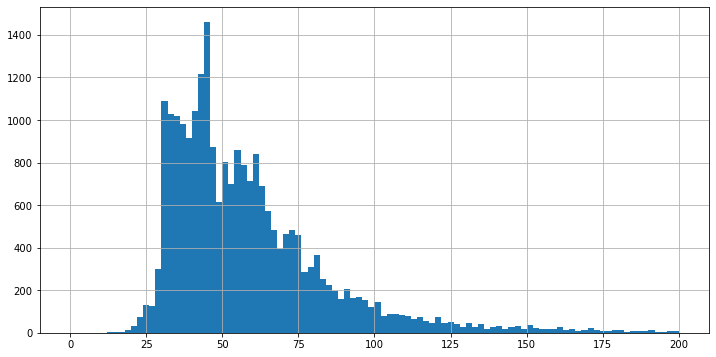

In [124]:
data['total_area'].hist(bins=100, range=(0,200), figsize=(12,6))

#### Вывод

Из гистограммы видно, что основная масса объявлений приходится на квартиры площадью от 30 до 60 квадратных метров. Самые часто встречающиеся квартиры площадью 45 кв.м.

Распределение объявлений по площадям близко к распределению Пуассона.

### Цена

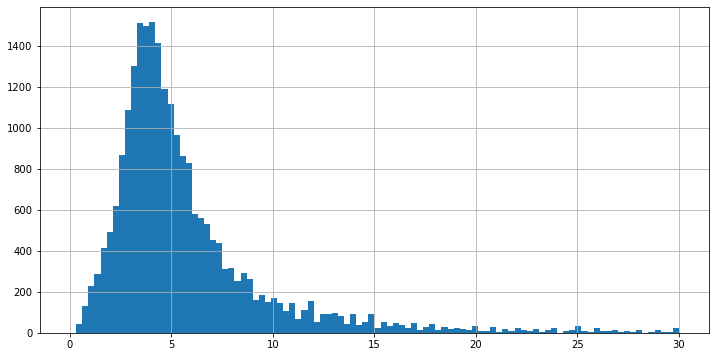

In [125]:
price_hist = data['last_price'].hist(bins=100, range=(0.01,30), figsize=(12,6), grid= True)


#### Вывод

Распределение цен на квартиры также соответствует распределению Пуассона. 
Основной пик приходится на 3,5-4млн рублей, что соответствует ожиданию. Квартиры дороже 8 миллионов встречаются гораздо реже. 

### Количество комнат

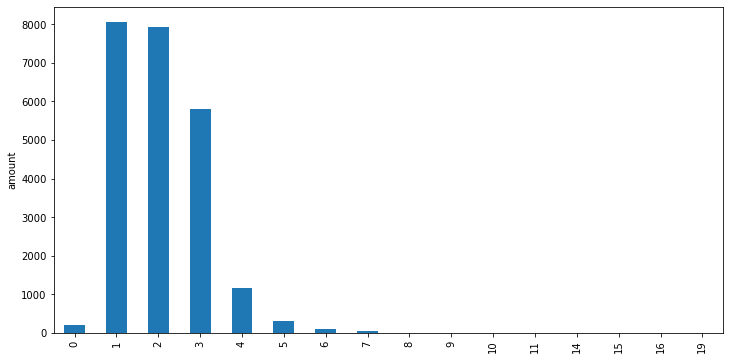

In [126]:
rooms_hist = data['rooms'].value_counts().sort_index().plot(kind='bar',figsize=(12,6), ylabel='amount')

#### Вывод 

Из графика видно, что основная часть объявлений приходится на 1, 2 и 3 комнатные квартиры, что так же вполне ожидаемо.

### Высота потолков

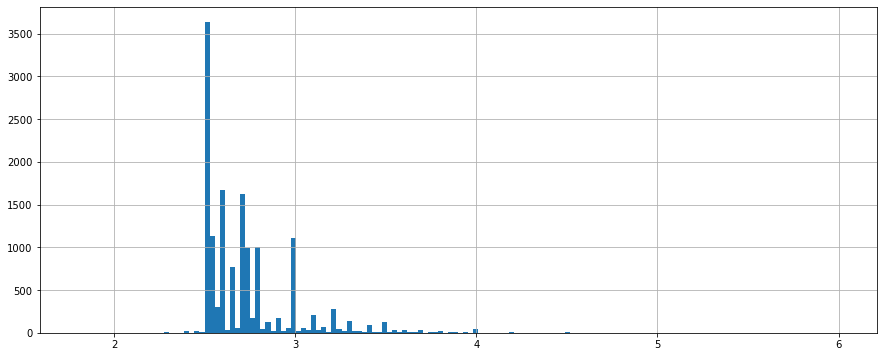

In [127]:
ceiling_hist = data['ceiling_height'].hist(bins=150,  figsize=(15,6), range=(1.8, 6))

In [128]:
data['ceiling_height'].value_counts()

2.50    3522
2.60    1647
2.70    1582
3.00    1110
2.80     992
        ... 
3.43       1
4.30       1
3.39       1
4.65       1
3.59       1
Name: ceiling_height, Length: 164, dtype: int64

#### Вывод

С высотой потолков тоже никаких сюрпризов - основная часть квартир имеют потолки стандартной высоты 2.5 метра. Чуть реже встречаются квартиры с высотой, вырьирующейся от 2.5 до 3 метров. Потолки высотой от 3 до 4 метров могут быть присуще старому фонду и коммунальным квартирам. 

### Сроки продажи квартир

Посчитаем количество квартир для каждого срока продажи в днях.

In [129]:
data['days_exposition'].value_counts().head(20)

180    3219
45      879
60      538
7       234
30      208
90      204
4       176
3       158
5       152
14      148
9       143
20      139
8       139
44      138
11      135
18      128
13      128
10      127
28      126
15      126
Name: days_exposition, dtype: int64

Разделим полученый список на подгруппы по неделям, месяцам и кварталам.

In [130]:
def sell_time (days):
    if 0 < days <= 7:
        return '0. week'
    if 7 < days <= 14:
        return '1. two weeks'
    if 14 < days <= 30:
        return '2. month'
    if 30 < days <= 60:
        return '3. two month'
    if 60 < days <= 90:
        return '4. quarter'
    if 90 < days <= 180:
        return '5. half a year'    
    if 180 < days <= 240:
        return '6. three quartals'
    if 270 < days <= 360:
        return '7. year'
    if 360 < days <= 540:
        return '8. year and a half'
    if 540 < days :
        return '9. two years'  


Построим график по группам.

<AxesSubplot:ylabel='amount'>

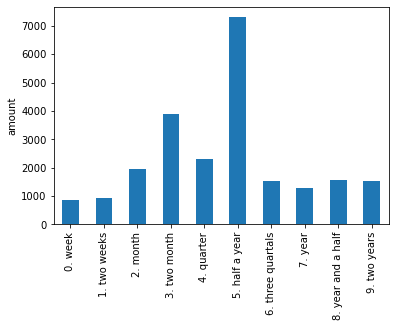

In [131]:
data['days_exposition'].apply(sell_time).value_counts().sort_index().plot(kind='bar', ylabel='amount')

Также рассчитаем среднее и медианное время продажи квартир по всему датасету. Сверим полученные значения с графиком.

In [132]:
sell_time_mean = data['days_exposition'].mean()
print(sell_time_mean)
sell_time_median = data['days_exposition'].median()
print(sell_time_median)

180.55540529118417
124.0


In [133]:
data['days_exposition'].describe([.1,.5,.90])

count    23662.000000
mean       180.555405
std        204.291175
min          1.000000
10%         19.000000
50%        124.000000
90%        425.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-30.0, 700.0)

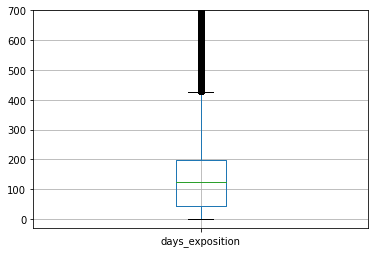

In [134]:


data[['days_exposition']].boxplot()
plt.ylim(-30, 700)

Объявленя сроком больше 425 дней очень редки и их можно считать выбросами. Проверим, какую долю занимают выбросы из всего датасета.

In [135]:
data = data.loc[data['days_exposition']<(data['days_exposition'].describe([.1,.5,.90])['90%'])]

#### Вывод

Медианное значение для срока продажи квартир равняется 124 дням, что соответствует 4 месяцам. Среднее значение - 180 дней, то есть полгода.

Чаще всего от подачи объявления до продаже квартиры уходит от 2 до 6 месяцев. 
Можно считать, что квартира продалась очень быстро, если с помента подаи объявления прошло меньше 2 месяцев. 
И соответственно, если объявление висит больше полугода, то щансы на продажу значительно уменьшаются.

### Зависимость цены от параметров

#### Площадь квартиры

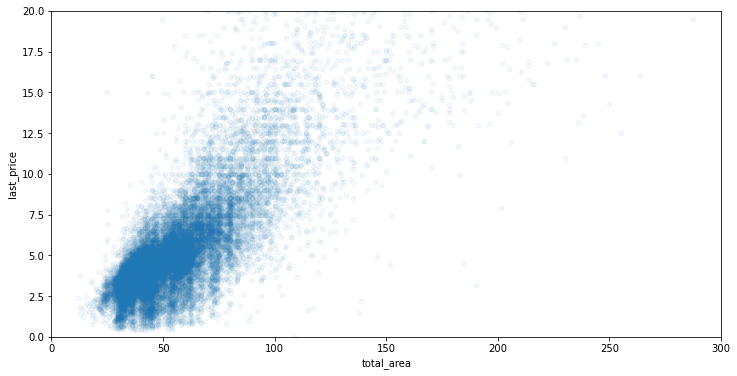

In [136]:
area_plot = data.plot(kind='scatter', 
          x='total_area',y='last_price', 
          xlim=(0,300), ylim=(0,20),
          alpha=0.05, figsize=(12,6)
         )

##### Вывод 

Самыми распространенными являются квартиры от 25 до 70 квадратных метров и стоимостью от 1.5 до 6 миллионов рублей.
Так же из графика видна зависимость стоимости от площади квартиры близкая к линейной (с определенной погрешностью).

#### Комнаты

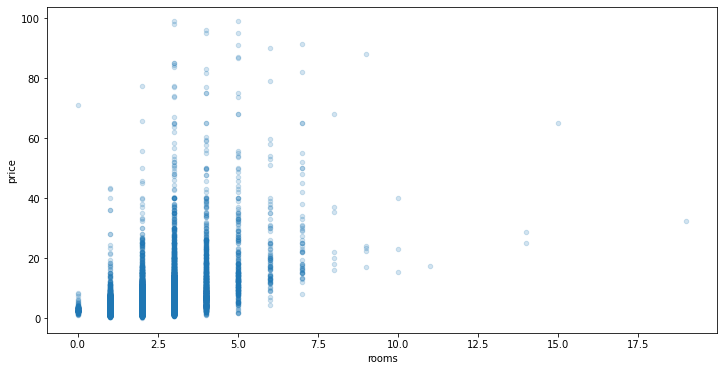

In [137]:
rooms_cost_scatter = \
data.plot(kind='scatter',x='rooms',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.2)

In [138]:
data['rooms'].value_counts()

1     7352
2     7210
3     5134
4      992
5      260
0      187
6       82
7       50
8        7
9        5
10       3
14       2
11       1
15       1
19       1
Name: rooms, dtype: int64

##### Вывод 

Из полученного графика мы видим, что студий дороже 10 миллионов не бывает, так же как и дешевых 7-8 комнатных. 

С ростом чиса комнат стоимоть растет, но зависимость не линейная.  

#### Расположение

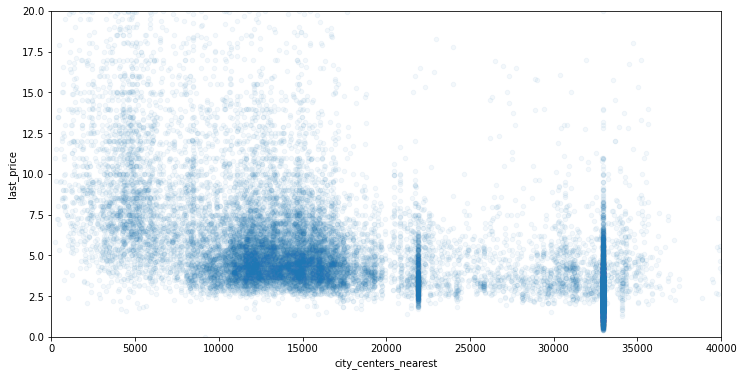

In [139]:
distance_price_hist = data.plot(kind='scatter', 
          x='city_centers_nearest',y='last_price', 
          xlim=(0,40000), ylim=(0,20),
          alpha=0.05, figsize=(12,6)
         )

##### Вывод 

На графике видны полосы в районе 22 и 33 километров. Эти аномалии образовались вследствие заполнения пропусков медианными значениями, а так же заполнения отсутствующих данных о поселках Санкт-Петербургом.

Больше всего квартир находятся в разиусе от 10 до 20 километров от центра. Это соответствует застройке удаленных районов города многоквартирными домами. Квартиры в таких районах в основном стоят от 3 до 6 миллионов.

Так же из графика заметна минимальная пороговая стоимость квартир в петербурге - 2.5 миллиона рублей.

Основная часть квартир в центре города, в радиусе до 8 километров, оценивается от 5 до 10 миллионов рублей.

#### Этаж

(4.5, 6.5)

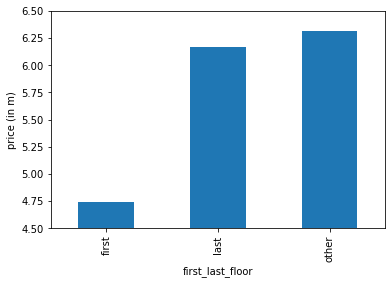

In [140]:
floor_price_hist = data.groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(4.5, 6.5)


Согласно построенному графику, разница между последними и не первыми этажами не существенна.
Тогда как квартиры на первом этаже значительно проседают по цене, относительно остальных квартир. 
Но это можно объяснить так же тем, что в Петербурге новостройки в основном сейчас проектируются с коммерческими помещениями на первых этажах. Соответственно квартир на первых этажах внутри Петербурга меньше, чем в поселках. 

Проверим эту гипотезу ниже. Посчитаем долю квартир на первых этажах относительно всех квартир отдельно для Петербурга и его пригородов, и отдельно для региона.

In [141]:
first_floor_spb_ratio = (len(data.query("city_centers_nearest < 23000 and first_last_floor == 'first' ")) / 
            len(data.query("city_centers_nearest < 23000")))
first_floor_spb_ratio

0.09593528546597138

In [142]:
first_floor_region_ratio = (len(data.query("city_centers_nearest > 23000 and first_last_floor == 'first' ")) / 
            len(data.query("city_centers_nearest > 23000 ")))
first_floor_region_ratio

0.18154526781482067

Гипотеза подтвердилась, в Петербурге в два раза меньше квартир на первых этажах, чем в отдаленных населенных пунктах.

Построим графики отдельно для квартир в олласти и в Петербурге.

(5.0, 8.5)

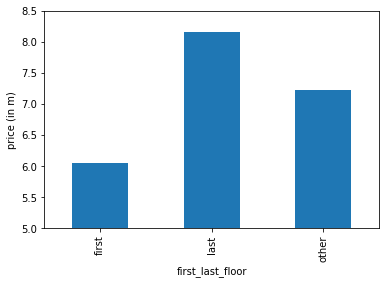

In [143]:
floor_price_spb_hist = data.query("city_centers_nearest < 23000").groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(5, 8.5)

(3.0, 3.8)

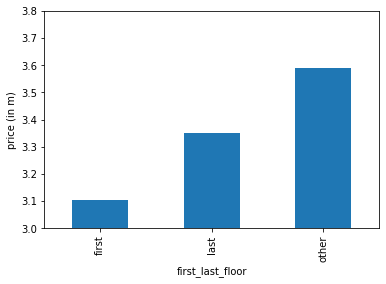

In [144]:
floor_price_region_hist = data.query("city_centers_nearest > 23000").groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(3, 3.8)

##### Вывод 

И в Петербурге и в Ленобласти квартиры на первых этажах оцениваются значительно ниже остальных.
Также в Петербурге гораздо больше ценятся квартиры на последних этажах, вероятно, они расцениваются как видовые или пентхаусы. Тогда как в области последние этажи оцениваются ниже остальных.

#### Дата размещения

(5.5, 6.5)

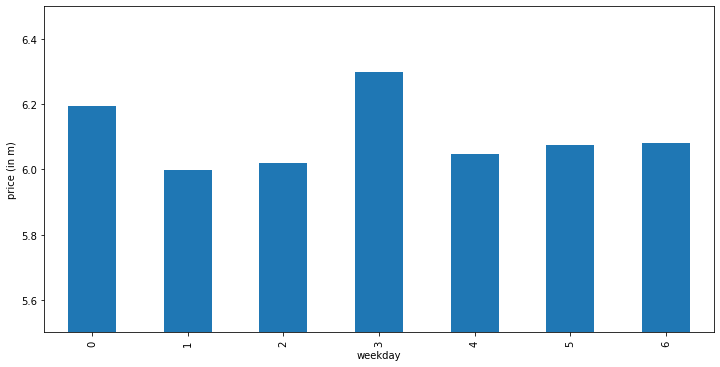

In [145]:
publish_weekday_count = data.groupby(by='weekday')['last_price'].mean().plot(kind='bar',ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 6.5)

(1500.0, 4000.0)

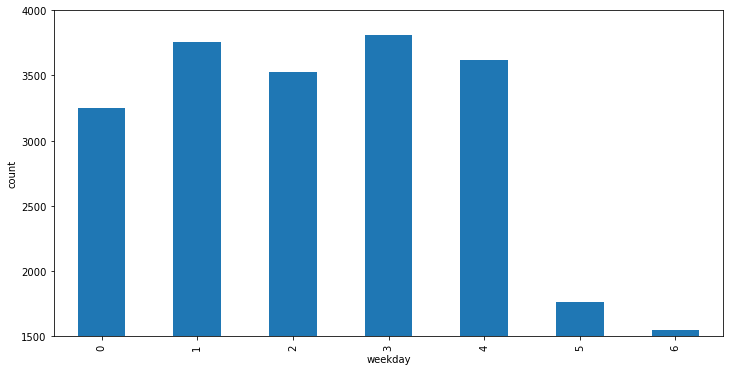

In [146]:
publish_weekday_mean_price = data.groupby(by='weekday')['last_price'].count().plot(kind='bar',ylabel='count', figsize=(12,6))
plt.ylim(1500, 4000)

(5.5, 6.5)

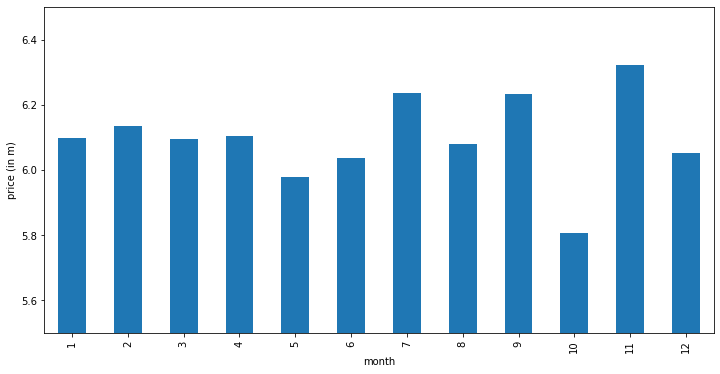

In [147]:
publish_month_mean_price = data.groupby(by='month')['last_price'].mean().plot(kind='bar', ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 6.5)

(800.0, 2500.0)

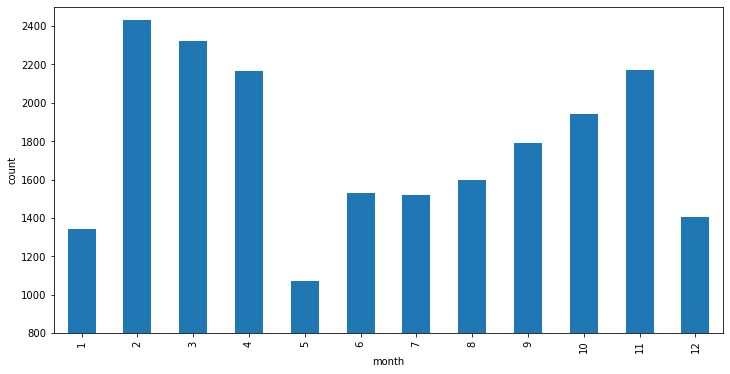

In [148]:
publish_month_count = data.groupby(by='month')['last_price'].count().plot(kind='bar', ylabel='count', figsize=(12,6))
plt.ylim(800, 2500)

(5.5, 18.0)

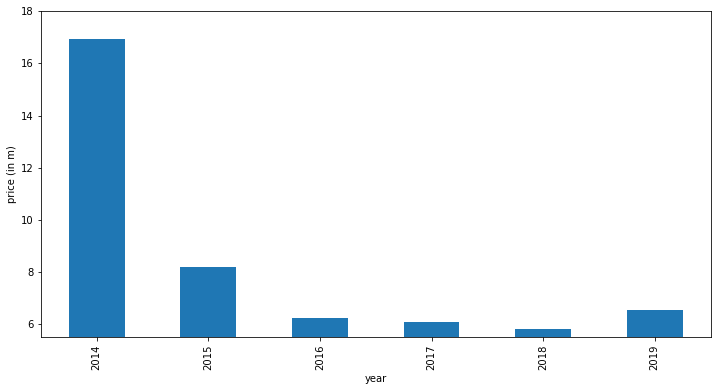

In [149]:
publish_year_mean_price  = data.groupby(by='year')['last_price'].mean().plot(kind='bar',ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 18)

(-100.0, 9000.0)

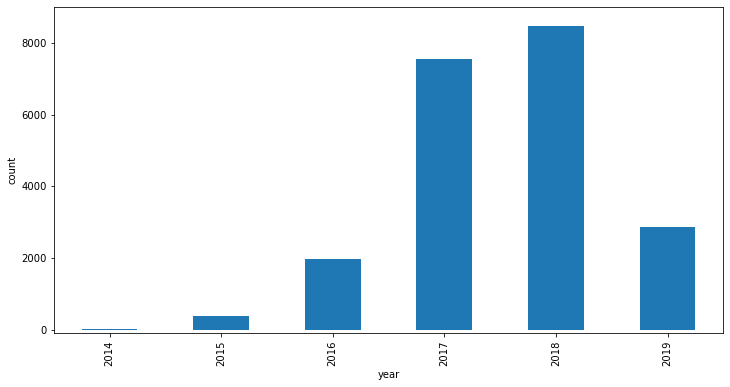

In [150]:
publish_year_count = data.groupby(by='year')['last_price'].count().plot(kind='bar',ylabel='count', figsize=(12,6))
plt.ylim(-100, 9000)

<AxesSubplot:xlabel='year', ylabel='price'>

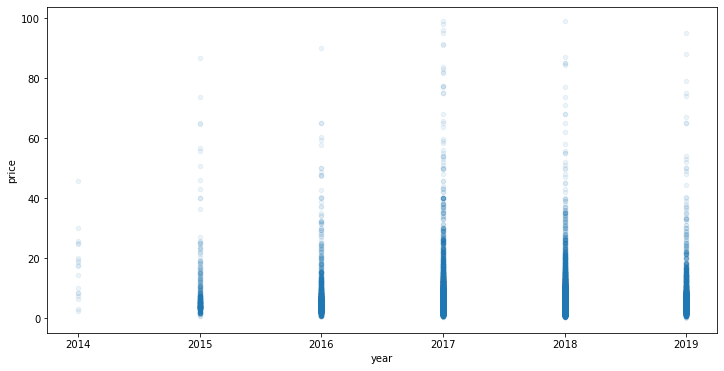

In [151]:
data.plot(kind='scatter',x='year',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.08)

<AxesSubplot:xlabel='first_day_exposition', ylabel='price'>

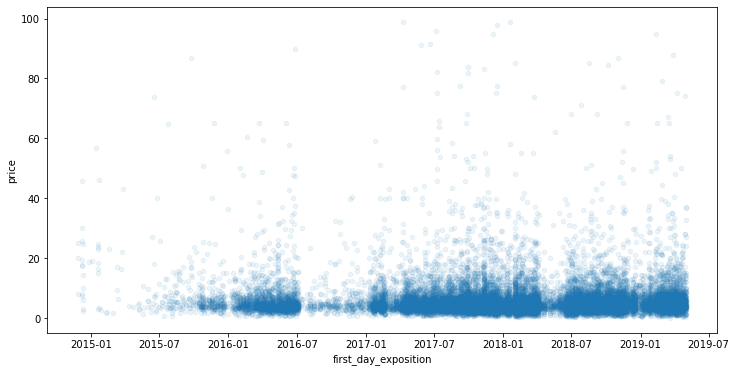

In [152]:
data.plot(kind='scatter',x='first_day_exposition',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.08)

In [153]:
data[['last_price','total_area','rooms','city_centers_nearest','year']].corr()

,last_price,total_area,rooms,city_centers_nearest,year
last_price,1.000000,0.768946,0.471166,-0.394498,-0.019392
total_area,0.768946,1.000000,0.764840,-0.252441,-0.044927
rooms,0.471166,0.764840,1.000000,-0.175977,-0.022852
city_centers_nearest,-0.394498,-0.252441,-0.175977,1.000000,0.030758
year,-0.019392,-0.044927,-0.022852,0.030758,1.000000


<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Добавила интерпретацию корреляций
    
</div>

Между площадью квартиры и ценой, а так же между площадью и количеством комнат, наблюдается высокая корреляция. 
Но при этом корреляция напрямую между количеством комнат и ценой слабая. 

ЗАвисимость цены от удаленности от центра так же присутствует, но слабо.

 #####  Вывод 
 Графики показывают, что цена квартиры не зависит от дня или месяца публикации объявления. 
 
 А вот количество размещенных объявлений варьирутеся. В выходные дни объявлений публикуется в два раза меньше, чем в будни. 
 Самыми активными для риелторов являются весенние и осенние месяцы. На летние месяцы приходится период отпусков и дач, поэтому в это время объявлений меньше. Так же тихими для рынка недвижимости месяцами являются декабрь, январь и май, из-за обилия праздничных дней.
 
 Что касаетсся года продажи квартир, самыми трудными для рынка недвижимости были 2015 и 2016 года, как посдедствие кризиса 2014 года и падения курса рубля и покупательной способности россиян. При этом стоимость квартир в 2014 была самой высокой в анализируемом периоде. Но данных за 2014 год слишком мало для того, чтобы сделать комплексный вывод.

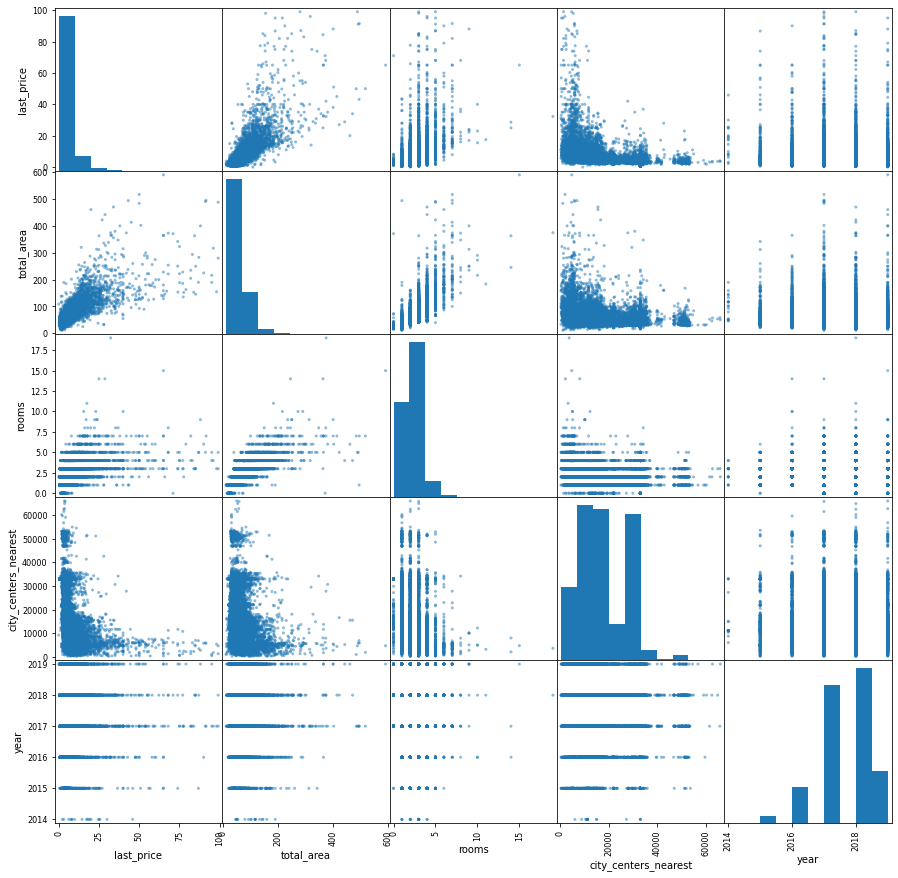

In [154]:
matrix_plot = pd.plotting.scatter_matrix(data[['last_price','total_area','rooms','city_centers_nearest','year']],figsize=(15,15))

### Квартиры в области

In [155]:
large_villages_list = list(data.loc[data['locality_name']!='Санкт-Петербург'].groupby('locality_name')['is_apartment'].count().sort_values().tail(10).index)

In [156]:
large_villages = data.query("locality_name in @large_villages_list")
large_villages.groupby('locality_name')['sq_m_price'].mean().sort_values()

locality_name
Выборг         58.229343
Всеволожск     68.960702
Гатчина        69.001245
Колпино        75.381551
Шушары         78.803975
Петергоф       84.738857
Мурино         86.372018
Парголово      89.746000
Кудрово        95.636986
Пушкин        102.843814
Name: sq_m_price, dtype: float64

(50.0, 110.0)

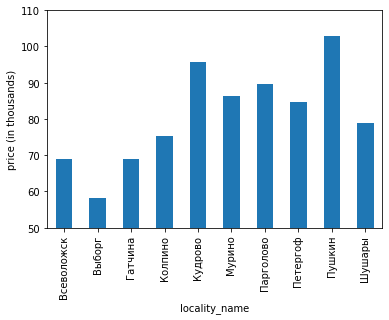

In [157]:
large_villages.groupby('locality_name')['sq_m_price'].mean().plot(kind='bar', ylabel='price (in thousands)')
plt.ylim(50, 110)

(4.0, 6.0)

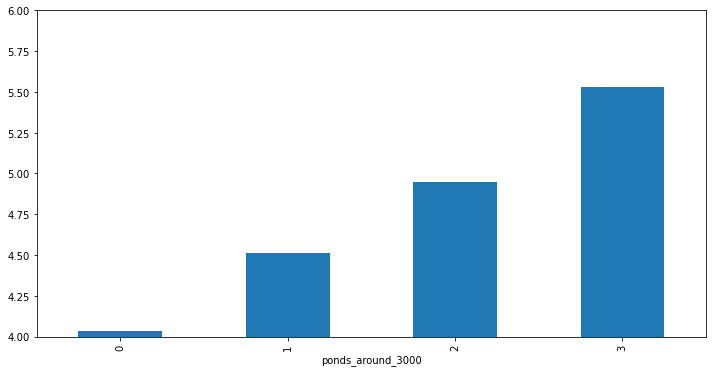

In [158]:
large_villages.groupby('ponds_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(4,6)

(3.8, 6.3)

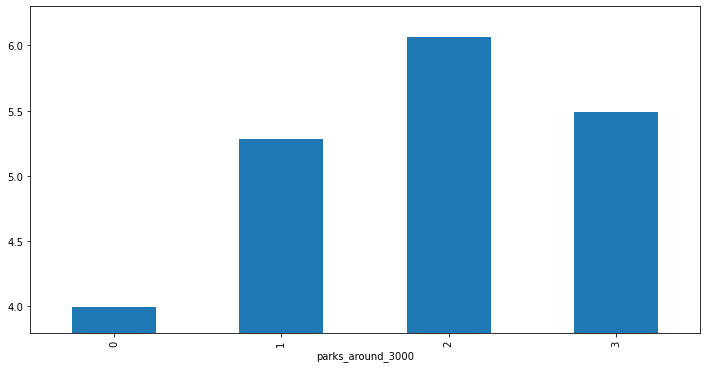

In [159]:
large_villages.groupby('parks_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(3.8,6.3)

Из графика видно, что наличие парков в радиусе 3км влияет на стоимоть жилья. 

Теперь посчитаем, на сколько в среднем каждый парк повышает стоимость квартиры.

In [160]:
diff=[]
mean_cost_parks = large_villages.groupby('parks_around_3000')['last_price'].mean()
mean_cost_parks
for i in range(len(mean_cost_parks)-1):
    diff.append(mean_cost_parks[i+1]-mean_cost_parks[i])
parks_mean_increase_village = sum(diff)/len(diff)
parks_mean_increase_village

0.4990401200944155

И проделаем то же самое для прудов

In [161]:
diff=[]
mean_cost_ponds = large_villages.groupby('ponds_around_3000')['last_price'].mean()
mean_cost_ponds
for i in range(len(mean_cost_ponds)-1):
    diff.append(mean_cost_ponds[i+1]-mean_cost_ponds[i])
ponds_mean_increase_village = sum(diff)/len(diff)
ponds_mean_increase_village

0.4988098503966573

Посмотрим, сколько это от средней стоимости квартиры по области.

In [162]:
print((parks_mean_increase_village / large_villages['last_price'].mean()).round(2)*100)
print((ponds_mean_increase_village / large_villages['last_price'].mean()).round(2)*100)

12.0
12.0


#### Вывод

Самым дорогим населенным пунктом в области, согласно полученным данным, является Пушкин. Но, так как юридически Пушкин находится в составе Санкт-Петербурга, то у его жителей есть доступ к социальным благам Петербурга, это может оказывать влияние на стоимость жилья. 

Тогда как второй по стоимости жилья населенный пункт - Кудрово, относится уже к Ленинградской области. Поэтому предлагаю считать самым дорогим населенным пунктом именно Кудрово, а не Пушкин.

В области наличие рядом парка или пруда добавляет к стоимости квартиры в среднем 0.5мл рублей или 12%.

### Квартиры в Санкт-Петербурге

In [163]:
spb_flats = data.query("locality_name == 'Санкт-Петербург'").copy()
spb_flats['city_centers_km'] = (spb_flats['city_centers_nearest'] / 1000).astype(int)

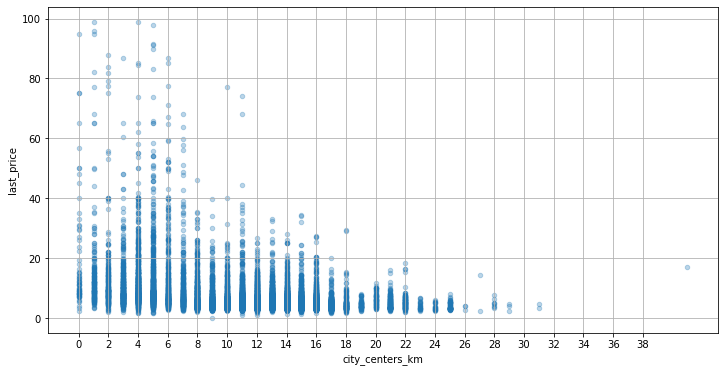

In [164]:
ax = spb_flats.plot(x='city_centers_km', y='last_price', kind='scatter', alpha=0.3, figsize=(12,6))
major_ticks = np.arange(0, 40, 2)

ax.set_xticks(major_ticks)
ax.grid(which='both')

In [165]:
spb_center_flats = spb_flats.query("city_centers_km <= 7 ").copy()
spb_center_flats[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3112.000000,3112.000000,3112.000000,2014.000000
mean,88.474614,12.683246,2.753213,3.065134
std,53.603587,11.880419,1.415857,0.363081
min,12.000000,1.600000,0.000000,2.400000
25%,55.000000,6.500000,2.000000,2.800000
50%,75.950000,8.900000,3.000000,3.000000
75%,105.225000,13.800000,3.000000,3.250000
max,590.000000,99.000000,19.000000,5.800000


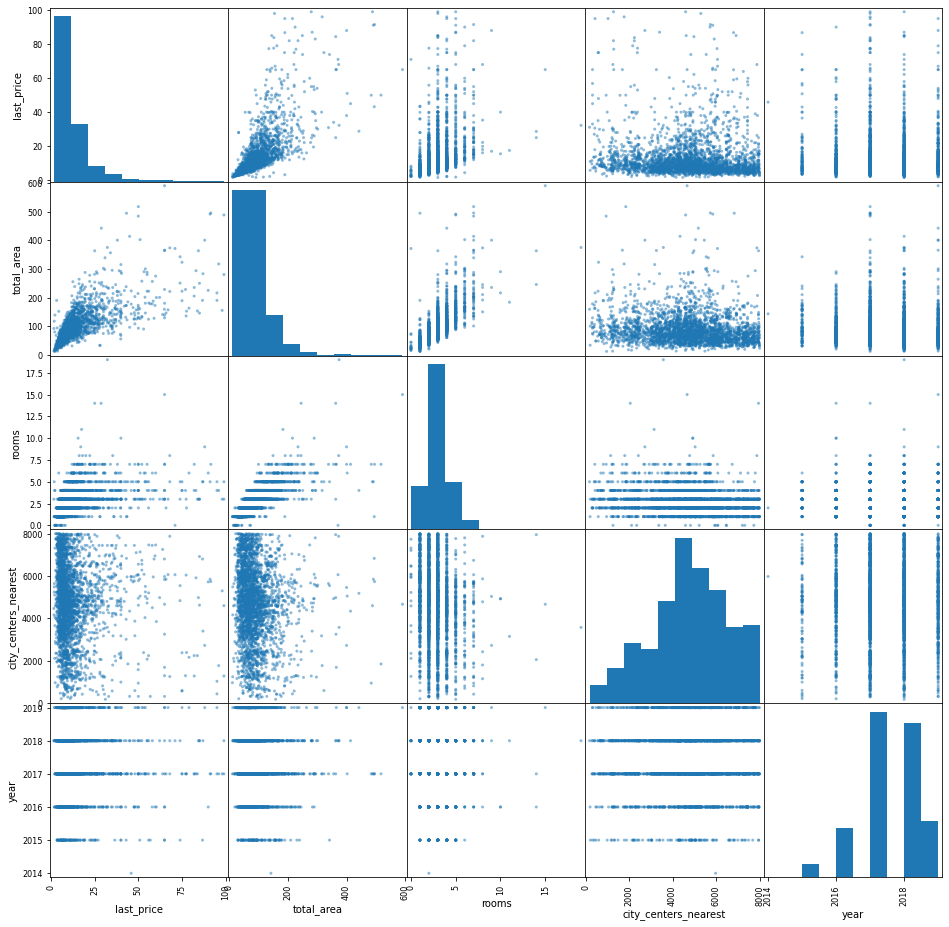

In [166]:
spb_matrix_plot = pd.plotting.scatter_matrix(spb_center_flats[['last_price','total_area','rooms','city_centers_nearest','year']],
                                             figsize=(16,16)
                                            )

(6.5, 13.0)

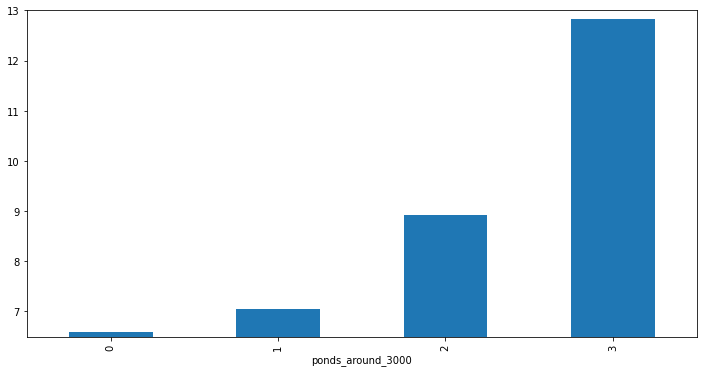

In [167]:
spb_flats.groupby('ponds_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(6.5,13)

(6.0, 15.0)

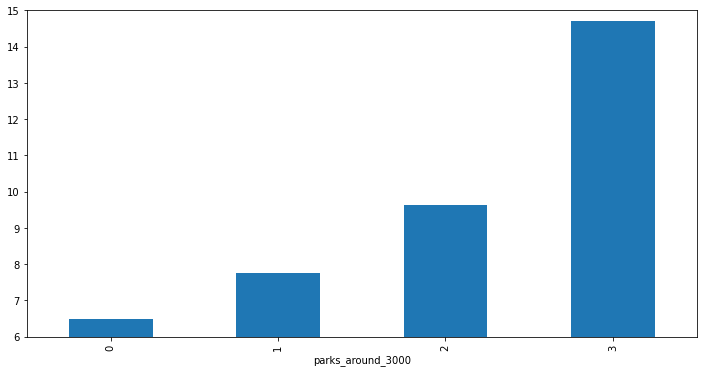

In [168]:

spb_flats.groupby('parks_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(6,15)

Из графика видно, что наличие парков в радиусе 3км влияет на стоимоть жилья. 

Теперь посчитаем, на сколько в среднем каждый парк повышает стоимость квартиры.

In [169]:
diff=[]
mean_cost_parks = spb_flats.groupby('parks_around_3000')['last_price'].mean()
mean_cost_parks
for i in range(len(mean_cost_parks)-1):
    diff.append(mean_cost_parks[i+1]-mean_cost_parks[i])
parks_mean_increase_spb = sum(diff)/len(diff)
parks_mean_increase_spb

2.742137355583379

И проделаем то же самое для прудов

In [170]:
diff=[]
mean_cost_ponds = spb_flats.groupby('ponds_around_3000')['last_price'].mean()
mean_cost_ponds
for i in range(len(mean_cost_ponds)-1):
    diff.append(mean_cost_ponds[i+1]-mean_cost_ponds[i])
ponds_mean_increase_spb = sum(diff)/len(diff)
ponds_mean_increase_spb

2.0811673107637723

In [171]:
print(int((ponds_mean_increase_spb / spb_flats['last_price'].mean()).round(2)*100))
print(int((parks_mean_increase_spb / spb_flats['last_price'].mean()).round(2)*100))

28
37


Найдем расстояние от центра питера до аэропорта. Для этого найдем квартиру в центре с ненулевым значением расстояния до аэропорта.

In [172]:
spb_flats.query("city_centers_km < 0.2 and  airports_nearest != 'NaN'")['airports_nearest'].describe()

count       73.000000
mean     21757.068493
std        806.804935
min      20641.000000
25%      21223.000000
50%      21857.000000
75%      22024.000000
max      25962.000000
Name: airports_nearest, dtype: float64

Здесь мы видим, что в датасете квартиры в центре Петербурга содержат разные значения расстояний до аэропорта в промежутке от 26 до 32 километров.
Если считать расстояние от центра до аропорта как среднее этих значений - 27.7 километров, а радиус центра 7.5км, то расстояние от аэропорта до верхней и нижней границы центра будет 

In [173]:
27.7-7.5

20.2

In [174]:
27.7+7.5

35.2

Построим график завистимостей стоимости квартиры от расстояния до аэропорта и нанесем на него границы центра города.

(0.0, 40.0)

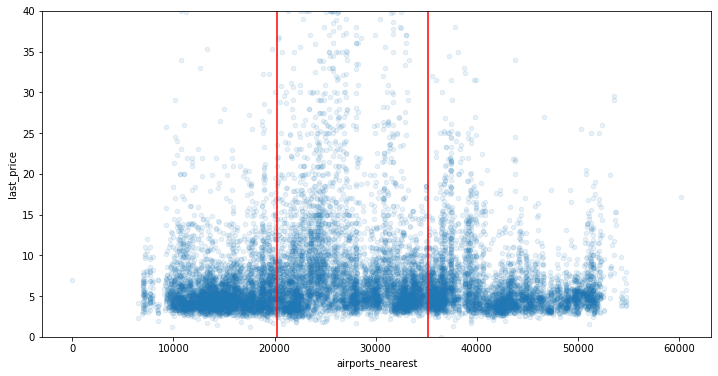

In [175]:
spb_flats['airports_nearest'] = spb_flats['airports_nearest']
spb_flats.plot(x='airports_nearest', y='last_price', kind='scatter', alpha=0.1, figsize=(12,6))
plt.axvline(x=20200, color='red')
plt.axvline(x=35200, color='red')
plt.ylim(0,40)

In [176]:
#spb_flats['airports_nearest_bins'] = pd.cut(spb_flats['airports_nearest'], 45)
spb_flats['airports_nearest_bins'] = (spb_flats['airports_nearest'] // 1000)
spb_flats['airports_nearest_bins']

0        18.0
3        28.0
4        31.0
7        23.0
9        50.0
         ... 
23687    40.0
23688    15.0
23689    17.0
23690    20.0
23694    24.0
Name: airports_nearest_bins, Length: 14099, dtype: float64

(4.5, 18.0)

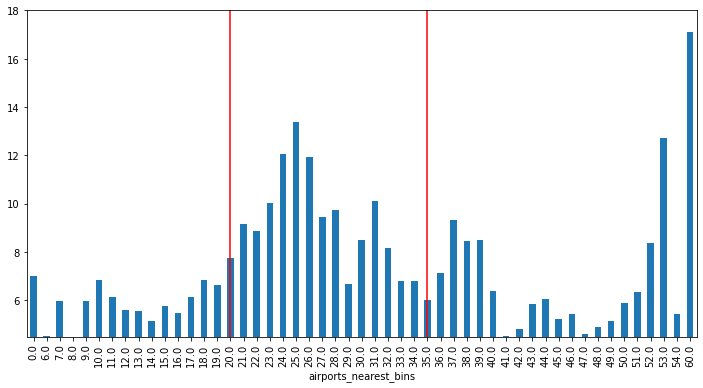

In [177]:
df_chart = spb_flats.groupby('airports_nearest_bins')['last_price'].mean()
df_chart.plot(kind='bar', figsize=(12,6))
plt.axvline(df_chart.index.searchsorted(20), color='red')
plt.axvline(df_chart.index.searchsorted(35), color='red')
plt.ylim(4.5,18)

Согласно полученному графику нельзя однозначно сказать, что близость к аэроорту влияет на стоимость жилья.

#### Вывод

Согласно полученным данным о стоимости жилья относительно расстояния, центром Петербурга является радиус 7.5 километров от центра, с небольшим выбросом в районе 11 километров, что может соответствовать району Беговой и Лахта центра.

Зависимость цены от площади квартиры в Санкт-Петербурге менее размазана в нижних диапазонах.

Однозначно можно сказать, что наличие парков в радиусе 3км от квартиры добавляет к ее стоимости в среднем 2.7 миллиона(37% стоимости) рублей, а каждый пруд - 2млн(28%).
 

###### Цель исследования

Установить параметры для определения рыночной стоимости объектов недвижимости, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельность. 

## Общий вывод

* В ходе предобработки данных были выполнены следующие шаги: 
    * Высчитали пропущенные значения площади жилых помещений и кухонь исходя из имеющихся данных общих площадей квартир и найденной средней нежилой площади.
    * Пропущенные значения этажности зданий были заполнены значениями этажей квартир.
    * Были обработаны и исправлены аномалии в значениях высот потолков. 
    * Было принято что квартиры с пропущенным флагом "апартаменты", действительно не являются апартаментами и, соответственно, пропуски были заполнены соответствующими значениями.
    * Пропущенные пользователями данные о количестве балконов были исправлены на отсутствие балконов.
    * Согласно имеющимся данным о расстояниях и информации из открытых источников, было найдено, к каким населенным пунктам относятся квартиры с пропущенными названиями населенных пунктов.
    * По тому же принципу были заполнены пропуски о расстояниях до аэропортов.
    * Было принято решение убрать из датафрэйма записи о квартирах дороже 100 миллионов, так как они редкие и негативно влияют на репрезентативность выборки при подсчете средних показателей.
    * В датафрэйм были добавлены дополнительные столбцы с рассчитанной информацией для стоимости квадратного метра, день, неделя и месяц публикации объявления, категория этажа квартиры (первый, последний или другой), а так же процентное соотношение жилой площади и кухни к общей площади квартиры.


* В результате исследования данных были сделаны следующие выводы:
    * Больше всего объявлений приходится на окраины Санкт-Петербурга, что может говорить о плотной многоэтажной застройке и активности рынка недвижимости в этих районах.
    * Самые частые объявления — 1 или 2 коматные квартиры площадью 45 квадратных метров, стоимостью около 4 миллионов рублей, высотой потолков 2.5 метра. 
    * Основная масса квартир продается в течение от 2 месяцев полугода.
    * Предельная цена студий — 10 миллионов, тогда как для квартир от 6 комнат такая стоимость является предельно минимальной.
    * Минимальная стоимость квартир в Петербурге — 2.5 миллиона рублей.
    * Квартиры в центре Петербурга в среднем оцениватся от 5 до 10 миллионов рублей.
    * Доля квартир на первых этажах в Петербурге значительно ниже, чем в области. Что свидетейльствует о заполненности первых этажей коммерческими помещениями.
    * Согласно проведенным исследованиям, на рынке недвижимости Ленинградской области преобладают недорогие квартиры, а элитное жилье почти не представлено.
    * Топ-3 самых дорогих населенных пунктов Ленинградской обласи - Пушкин, Кудрово и Парголово.
    * Также в регионах значительно меньше квартир с 4 и более комнатами, и более популярны однокомнатные квартиры.
    * В 2014 году в Питере рынок квартир испытывал дефицит, тогда как на рынке недвиимости Ленинградской области кризис сказался гораздо меньше.
    * В Петербурге цена квартиры растет вместе с количеством комнат, тогда как в области цена меньше зависит от количества комнат, но зависит от общей площади.
    * Центр Санкт-Петербурга определяется радиусом 7.5км.
    * Самыми горячими для рынка недвижимости сезонами являются весна и осень, тогда как летом и зимой наблюдается спад предложений.
    
**Заключение**
* Минимальная стоимость квартир в Петербурге — 2.5 миллиона рублей.
* Центр Петербурга определяется радиусом 7.5км от Невского проспекта, с небольшим исключением в виде 11км зоны в районе Лахта центра.
* Квартиры в центре Петербурга в среднем оцениватся от 5 до 10 миллионов рублей.
* Больше всего квартир находятся в разиусе от 10 до 20 километров от центра. Это соответствует застройке удаленных районов города многоквартирными домами. Квартиры в таких районах в основном стоят от 3 до 6 миллионов.
* Стоимость жилья в Петербурге зависит от площади квартиры, этажа, удаленности от центра, а так же от наличия рядом парков.
* В Петербурге каждый парк в радиусе 3км от квартиры повышает ее стоимость в среднем на 2.7 миллиона рублей, а каждый пруд - 2млн. 
* В области парки и пруды добавляют к стоимости квартиры только 0.5млн.
* Наиболее дорогие квартиры в Петербурге - этовидовые квартиры на последних этажах. Тогда как в Области такие квартиры не в цене.
* Влияние близости аэропорта на стоимость жилья незначительная.
* Наиболее высокая стоимость жилья была в 2014 и в 2015 годах. После чего произошел спад. 
* Количество объявлений в 2014-15 годах было значительно ниже последующих.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод